In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [3]:
drugstest_df = pd.read_csv('datadrug.csv')
drugstrain_df = pd.read_csv('drugstrain.csv')
drugstrain_df.head()
drugstest_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
drugstest_df.shape
drugstrain_df.shape

(53766, 7)

Explorasi Awal terdapat dua data frame dengan baris dan jumlah kolom sama kita gabungkan

In [5]:
data = pd.concat ([drugstrain_df, drugstest_df])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


# Deskriptif Statistika

In [6]:
data.describe()

,uniqueID,rating,usefulCount
count,107532.000000,107532.000000,107532.000000
mean,116386.701187,6.976900,27.989752
std,67017.428260,3.285192,36.172665
min,0.000000,1.000000,0.000000
25%,58272.000000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174588.000000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107532 entries, 0 to 53765
Data columns (total 7 columns):
uniqueID       107532 non-null int64
drugName       107532 non-null object
condition      106942 non-null object
review         107532 non-null object
rating         107532 non-null int64
date           107532 non-null object
usefulCount    107532 non-null int64
dtypes: int64(3), object(4)
memory usage: 4.9+ MB


In [8]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [9]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

# Visualisasi Data

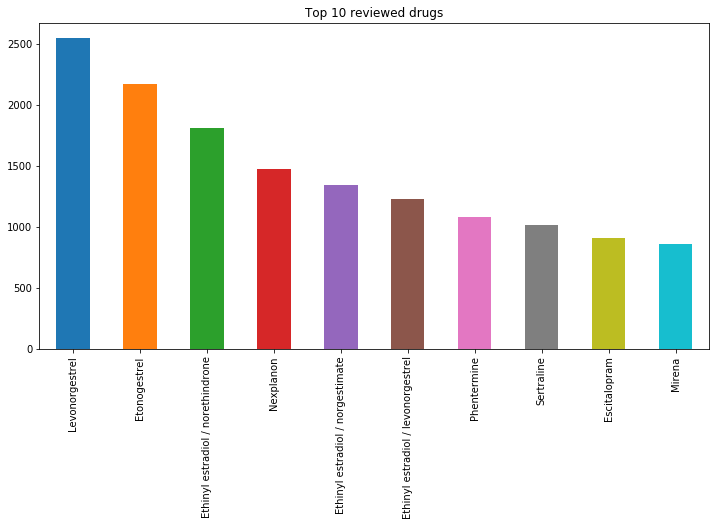

In [10]:
plot = data.drugName.value_counts().nlargest(10).plot(kind='bar', title="Top 10 reviewed drugs", figsize=(12,6))

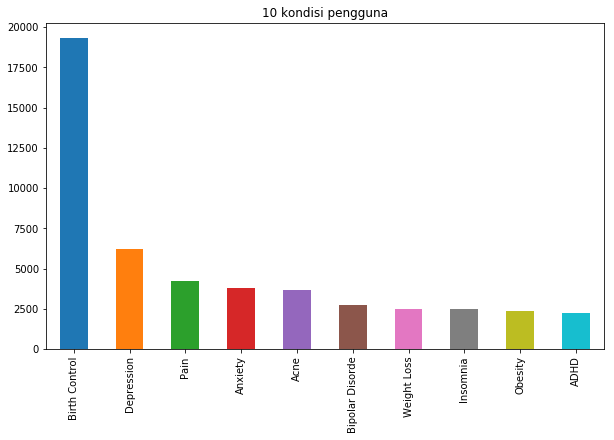

In [11]:
plot = data.condition.value_counts().nlargest(10).plot(kind='bar', title="10 kondisi pengguna", figsize=(10,6))


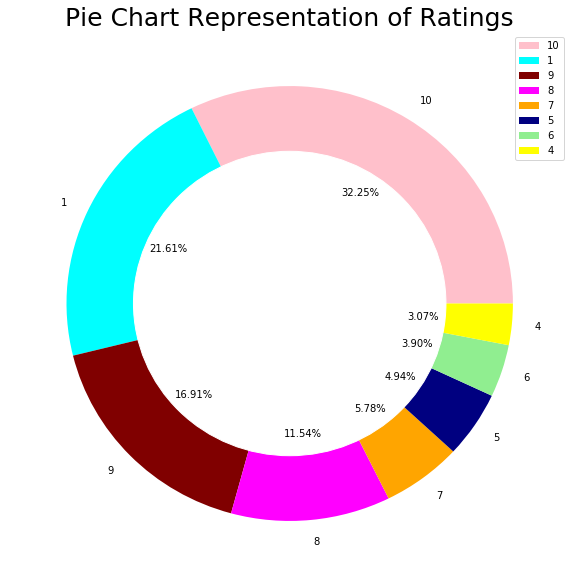

In [12]:
size = [70000, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [26]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    80538
0.0    26994
Name: Review_Sentiment, dtype: int64

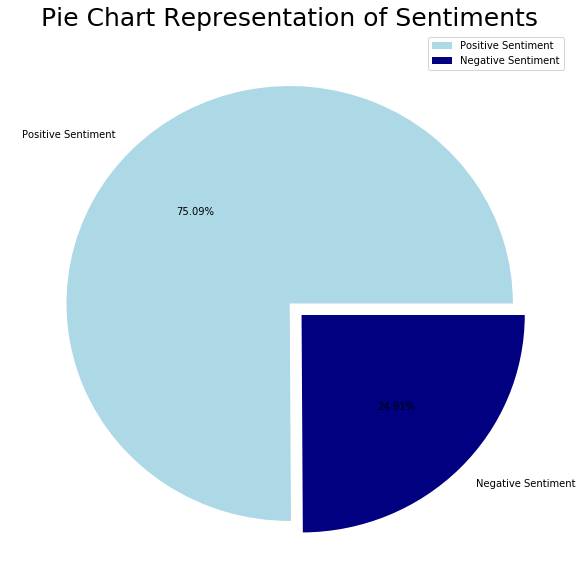

In [14]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.075]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

D:\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


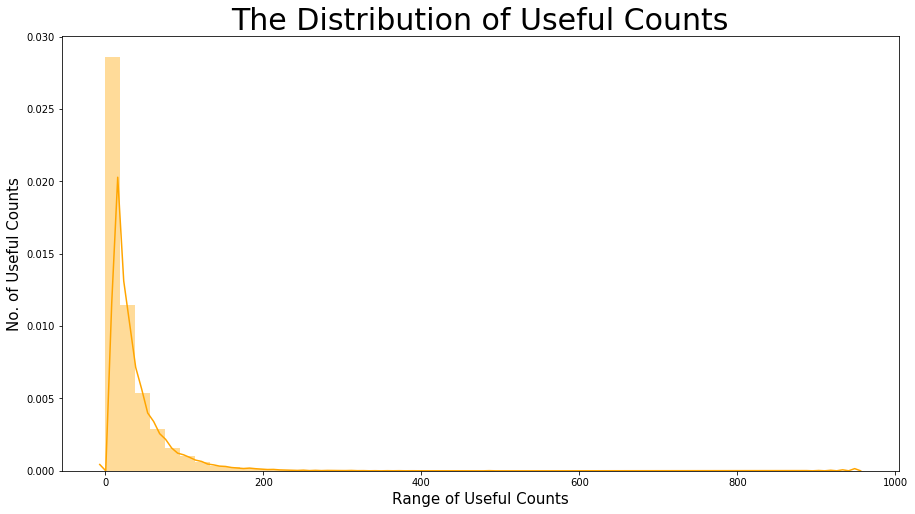

In [15]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

# Membuat Model

In [16]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()


1.0    80538
0.0    26994
Name: Review_Sentiment, dtype: int64

In [17]:
# Separating the day, month and year from the Date
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [18]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,day,month,year
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,2012-02-28,22,1.0,28,2,2012
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,2009-05-17,17,1.0,17,5,2009
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,2017-09-29,3,1.0,29,9,2017
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,2017-03-05,35,1.0,5,3,2017
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,1.0,22,10,2015


In [19]:
#target prediksi
y= data ['Review_Sentiment']
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        0.0
6        1.0
7        1.0
8        1.0
9        0.0
10       0.0
11       1.0
12       0.0
13       1.0
14       0.0
15       1.0
16       1.0
17       0.0
18       1.0
19       1.0
20       0.0
21       1.0
22       0.0
23       0.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
        ... 
53736    1.0
53737    1.0
53738    0.0
53739    1.0
53740    1.0
53741    0.0
53742    1.0
53743    1.0
53744    1.0
53745    1.0
53746    1.0
53747    0.0
53748    1.0
53749    1.0
53750    0.0
53751    0.0
53752    1.0
53753    1.0
53754    0.0
53755    1.0
53756    1.0
53757    1.0
53758    0.0
53759    1.0
53760    1.0
53761    1.0
53762    1.0
53763    1.0
53764    0.0
53765    1.0
Name: Review_Sentiment, Length: 107532, dtype: float64

In [20]:
#memilih features
features = ['condition', 'usefulCount', 'day', 'month', 'year']
X = data[features]
X

,condition,usefulCount,day,month,year
0,Depression,22,28,2,2012
1,"Crohn's Disease, Maintenance",17,17,5,2009
2,Urinary Tract Infection,3,29,9,2017
3,Weight Loss,35,5,3,2017
4,Birth Control,4,22,10,2015
5,Keratosis,13,3,7,2014
6,Birth Control,1,6,6,2016
7,Migraine Prevention,32,21,4,2009
8,Opiate Withdrawal,21,18,10,2016
9,Birth Control,3,16,4,2011


In [21]:
X.describe()

,usefulCount,day,month,year
count,107532.000000,107532.000000,107532.000000,107532.000000
mean,27.989752,15.698211,6.489175,2013.942510
std,36.172665,8.784836,3.434285,2.710337
min,0.000000,1.000000,1.000000,2008.000000
25%,6.000000,8.000000,3.000000,2012.000000
50%,16.000000,16.000000,7.000000,2015.000000
75%,36.000000,23.000000,9.000000,2016.000000
max,949.000000,31.000000,12.000000,2017.000000


In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
review_model = DecisionTreeRegressor (random_state=1)

In [24]:
features = data[['condition', 'usefulCount', 'day', 'month', 'year',]]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (75272, 5)
The Test set size  (32260, 5)


In [25]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

NameError: name 'LGBMClassifier' is not defined